In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist, pdist


data, y = make_blobs(n_samples=300, n_features=4, centers=3) # temporary dataset

# n_samples=300: This indicates that you want to generate 300 data samples.
# n_features=4: This specifies that each data sample should have four features.
# centers=3: This indicates that you want the samples to be distributed among three clusters or centers.




In [2]:
def elbow_method(data, k_max):
    wcss = []
    for i in range(1, k_max+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, k_max+1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()




In [3]:

def silhouette_method(data, k_max):
    silhouette_scores = []
    for i in range(2, k_max+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(2, k_max+1), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()




In [4]:

def bic_method(data, k_max):
    bic_values = []
    for i in range(1, k_max+1):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        bic_values.append(gmm.bic(data))

    plt.plot(range(1, k_max+1), bic_values)
    plt.title('BIC Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    plt.show()




In [5]:
def gap_statistic_method(data, k_max):
    gap_values = np.zeros((k_max,))
    for k in range(1, k_max):
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        gap_values[k] = np.log(np.mean(cdist(data, k_means.cluster_centers_, 'euclidean'))) - \
                        np.log(np.mean(pdist(data, 'euclidean')))

    plt.plot(range(1, k_max), gap_values[1:])
    plt.title('Gap Statistic Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Gap Statistic')
    plt.grid()
    plt.show()
    

In [6]:
cluster_limit = 10

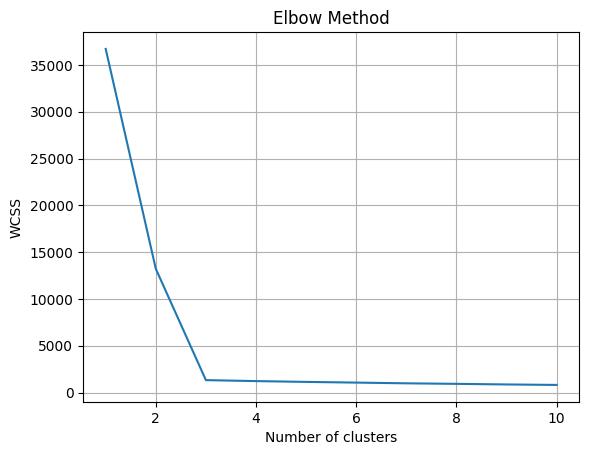

In [7]:
elbow_method(data, cluster_limit)


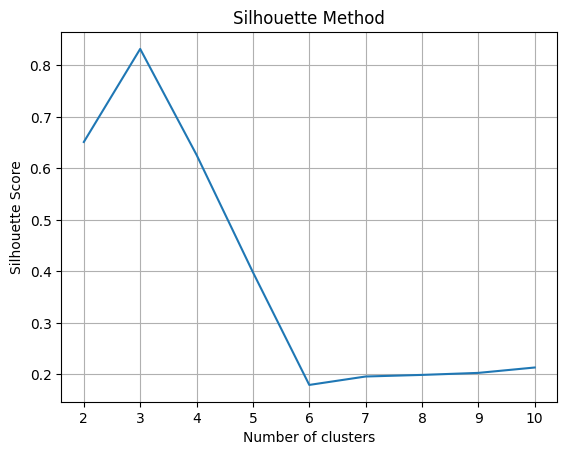

In [8]:
silhouette_method(data, cluster_limit)

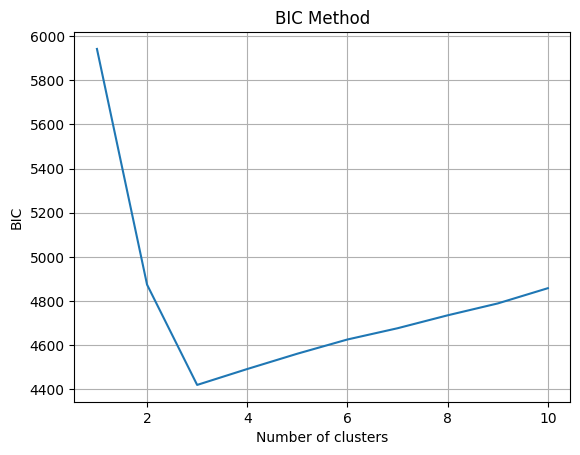

In [9]:
bic_method(data, cluster_limit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

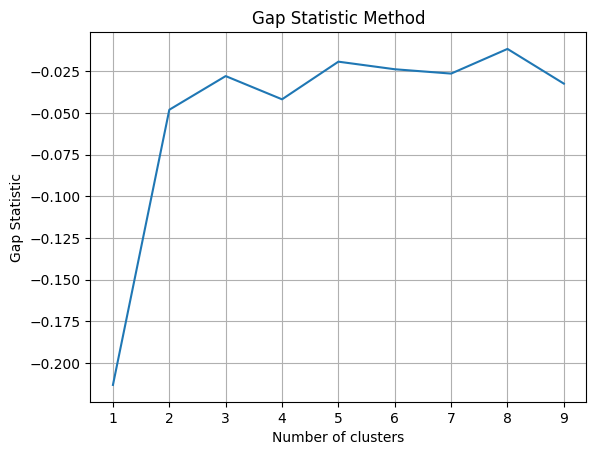

In [10]:
gap_statistic_method(data, cluster_limit)